# Regression Tutorial



## Import packages

Import packages to make most of the third-party functions work.


In [35]:
import numpy as np
import csv
import matplotlib.pyplot as plt

## Read data from .csv

The simple way to read data from our .csv file.


In [36]:
price_list = list()

# read s&p500 data
with open('data/S&P500.csv','r') as f:
    for row in csv.reader(f,delimiter=','):
            price_list.append(row[4])

  ## Save as numpy array
  
  It's such a better data type to store data.

In [37]:
data = np.array(price_list[1:],dtype=np.float32)
data

array([1426.19, 1462.42, 1459.37, ..., 2639.4 , 2666.94, 2669.91],
      dtype=float32)

## Supposed to  them split into two parts as training data and testing data

We predict next price by the current price.

In [45]:
split_rate = 0.2 # HOW TO DIVIDE TRAINING DATA AND TESTING DATA


# training data
train_X = data[:-round(len(data)*split_rate)-1].reshape(-1,1)
train_y = data[1:-round(len(data)*split_rate)].reshape(-1,1)

# testing data
test_X = data[-round(len(data)*split_rate)-1:-1].reshape(-1,1)
test_y = data[-round(len(data)*split_rate):].reshape(-1,1)

## Import scikit learn library


In [46]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## linear_model.LinearRegression

In [47]:
# Create linear regression object
regr = linear_model.LinearRegression()

## Training

In [48]:
# Train the model using the training sets
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Prediction

In [52]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(test_X)

## attributes we got from above prediction

In [54]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, diabetes_y_pred))

Coefficients: 
 [[0.9962051]]
Mean squared error: 398.08
Variance score: 0.98


## Visualization

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


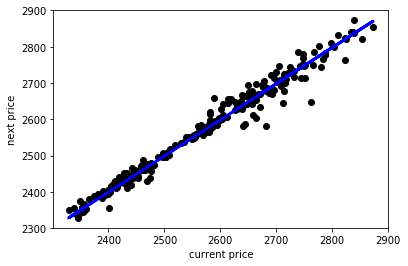

In [55]:
# Plot outputs
plt.scatter(test_X, test_y,  color='black')
plt.plot(test_X, diabetes_y_pred, color='blue', linewidth=3)
plt.legend(loc='upper right')
plt.ylabel('next price')
plt.xlabel('current price')
plt.show()